In [ ]:
###DO NOT EDIT THIS CODE
################################################################################################################################

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
from PIL import Image
import matplotlib.pyplot as plt

# GPUs are 3x faster than CPU. Better to use if it is available 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define Loss Function
loss_function = nn.CrossEntropyLoss()

# This function returns the number of parameters in the model
def num_params(model):
  return sum([p.numel() for p in model.parameters()])

# Define a Training Function. This function will: compute the forward pass, backpropagate,
# update the weights, and repeat the steps for a given number of epochs. At each epoch, 
# it will output the training loss and test loss at every step
def train(epochs, model, trainloader, testloader, optimizer, loss_function):
  for epoch in range(epochs):
    loss_epoch = np.array([])
    train_correct, train_total = 0, 0
    test_correct, test_total = 0, 0

    for data, labels in trainloader:
      # convert into GPU objects if needed
      input_data = data.to(device)
      labels = labels.to(device)

      # forward pass
      predict = model(input_data)
      
      # backward pass
      loss = loss_function(predict, labels)
      optimizer.zero_grad()
      loss.backward()

      # update parameters (weights and biases)
      optimizer.step()

      # store progress
      loss_epoch = np.append(loss_epoch, loss.item())

    # evaluate test accuracy
    for data, labels in testloader:
      input_data = data.to(device)
      labels = labels.to(device)
      predict = model(input_data)
      for i, out in enumerate(predict):
        pred = torch.argmax(out)
        if pred == labels[i]:
          test_correct+=1
        test_total+=1

    test_accuracy = test_correct/test_total    
  
    print('epoch [{}/{}], training loss:{:.4f}, test accuracy:{:.4f}'.format(epoch+1, epochs, np.mean(loss_epoch), test_accuracy))
################################################################################################################################

# **Load Dataset**

Available datasets are: MNIST, CIFAR10

## CIFAR10

In [ ]:
# download and load data
batch_size = 512

# download and transform train dataset
train_loader = torch.utils.data.DataLoader(datasets.CIFAR10('./cifar10_data', download=True, train=True, transform=transforms.Compose([
                                                transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                transforms.Normalize((0.1307,), (0.3081,)),
                                                transforms.Grayscale() # normalize inputs
                                                ])), batch_size=batch_size, shuffle=True)

# download and transform test dataset
test_loader = torch.utils.data.DataLoader(datasets.CIFAR10('./cifar10_data', download=True, train=True, transform=transforms.Compose([
                                                transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                transforms.Normalize((0.1307,), (0.3081,)),
                                                transforms.Grayscale() # normalize inputs
                                                ])), batch_size=batch_size, shuffle=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar10_data/cifar-10-python.tar.gz to ./cifar10_data
Files already downloaded and verified


In [ ]:
# it is a good idea to take a look at the data. Here we see it is a 28x28 grayscale image
for data, labels in train_loader:
  print(data[0].size())
  break

torch.Size([1, 32, 32])


# **Build a Network and Define Hyperparameters**

In [ ]:
12########################
####                #### 
#### EDIT THIS CELL ####
####                ####
########################

learning_rate = 10e-4
weight_decay = 10e-5
n_epochs = 25

# neural network
class NeuralNetwork(nn.Module):

  def __init__(self):

    super(NeuralNetwork, self).__init__()

    ### Define Layers
    self.conv1 = nn.Conv2d(1, 1, 3,padding=1)
    self.fc1 = nn.Linear(1024,700)
    self.fc2 = nn.Linear(700, 300)
    self.fc3 = nn.Linear(300,10)

  def forward(self, x):

    x = self.conv1(x)
    #x = F.BatchNorm2d(x)
    x = self.conv1(x)
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = (self.fc3(x))
    return x


# Every time you edit the neural network, you'll have to update this cell
# Create model object
model = NeuralNetwork().to(device)


# Loads Adam optimizer, which implements a version of gradient descent
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

tensor([[[-1.3198, -0.9107, -0.9107,  ..., -0.9678, -0.9591, -0.3372],
         [-1.5569, -1.3547, -1.3411,  ..., -1.3784, -1.3962, -0.0285],
         [-1.5543, -1.3644, -1.3449,  ..., -1.3436, -1.3835, -0.0253],
         ...,
         [-1.5748, -1.4586, -1.4186,  ..., -0.4431, -0.5126, -0.0145],
         [-1.4241, -1.3985, -1.3585,  ..., -0.4366, -0.5008, -0.0653],
         [-0.8161, -0.9109, -0.9695,  ..., -0.3410, -0.3756,  0.0111]]],
       device='cuda:0', grad_fn=<SqueezeBackward1>)


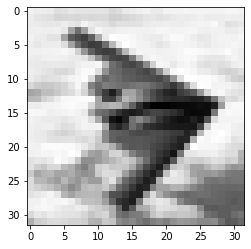

In [ ]:
from PIL import Image

for data, labels in test_loader:
  exd = data[1]
  exl = labels[1]
  break
print(model.conv1(exd.to(device)))

import matplotlib.pyplot as plt
plt.imshow(exd.permute(1,2,0).squeeze(), cmap='gray')
ex2 = (model.conv1(exd.to(device))).cpu().detach()
ex3 = (model.conv1(ex2.to(device))).cpu().detach()


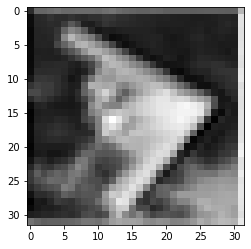

In [ ]:
plt.imshow(ex2.permute(1,2,0).squeeze(), cmap='gray')


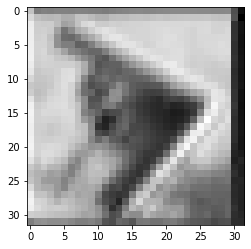

In [ ]:
plt.imshow(ex3.permute(1,2,0).squeeze(), cmap='gray')


In [ ]:
# check the structure of your network
print(model)

# apply your model to a single input. This helps check that 
# the dimensions are correct
model(torch.rand(1,1,32,32, device=device))

NeuralNetwork(
  (conv1): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=700, bias=True)
  (fc2): Linear(in_features=700, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=10, bias=True)
)


tensor([[ 0.0313,  0.0121, -0.0173,  0.0256, -0.0433, -0.0682,  0.0590,  0.0458,
          0.0535,  0.0018]], device='cuda:0', grad_fn=<AddmmBackward0>)

# **Train and Validate**

In [ ]:
train(n_epochs, model, train_loader, test_loader, optimizer, loss_function)

epoch [1/25], training loss:2.0251, test accuracy:0.3231
epoch [2/25], training loss:1.8437, test accuracy:0.3666
epoch [3/25], training loss:1.7505, test accuracy:0.3943
epoch [4/25], training loss:1.6750, test accuracy:0.4235
epoch [5/25], training loss:1.6123, test accuracy:0.4520
epoch [6/25], training loss:1.5573, test accuracy:0.4541
epoch [7/25], training loss:1.5235, test accuracy:0.4794
epoch [8/25], training loss:1.4718, test accuracy:0.4949
epoch [9/25], training loss:1.4267, test accuracy:0.5151
epoch [10/25], training loss:1.3773, test accuracy:0.5416
epoch [11/25], training loss:1.3249, test accuracy:0.5658
epoch [12/25], training loss:1.2696, test accuracy:0.5891
epoch [13/25], training loss:1.2105, test accuracy:0.6153
epoch [14/25], training loss:1.1341, test accuracy:0.6494
epoch [15/25], training loss:1.0595, test accuracy:0.6737
epoch [16/25], training loss:0.9847, test accuracy:0.7049
epoch [17/25], training loss:0.9006, test accuracy:0.7417
epoch [18/25], training